# EMPLOYEE ATTRITION CONTROL

### CASE STUDY
The project is to help a company which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee;
-Satisfaction Level
-Last evaluation
-Number of projects
-Average monthly hours
-Time spent at the company
-Whether they have had a work accident
-Whether they have had a promotion in the last 5 years
-Departments (column sales)
-Salary

Use your analytics skills to answer the following questions :
1. What type of employees are leaving?
2. Which employees are prone to leave next.
3. Recommendations

IMPORTING THE LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import statistics
%matplotlib inline

LET US IMPORT AND READ THE EMPLOYEE ATTRITION EXCEL FILE


In [2]:
excel_file = 'TakenMind-Python-Analytics-Problem-case-study-1-1 (2).xlsx'

employee_data = pd.read_excel(excel_file)

employee_data.head()

,"The data is for company X which is trying to control attrition. There are two sets of data: ""Existing employees"" and ""Employees who have left"". Following attributes are available for every employee."
0,Satisfaction Level
1,Last evaluation
2,Number of projects
3,Average monthly hours
4,Time spent at the company


The above read the first sheet of the excel file which contains just the assigment information/instructions.

The second and third sheets contain the data of the employees. The second sheet is the 'existing employees' and the third is 'employees who have left'

LET US VISUALIZE SHEET 2 (EXISTING EMPLOYEE) AS EMPLOYEE_DATA2

In [3]:
employee_data2 = pd.read_excel(excel_file, sheet_name=1, index_col=0)

employee_data2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
Emp ID,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,sales,low
2002,0.82,0.67,2,202,3,0,0,sales,low
2003,0.45,0.69,5,193,3,0,0,sales,low
2004,0.78,0.82,5,247,3,0,0,sales,low
2005,0.49,0.60,3,214,2,0,0,sales,low


LET US VISUALIZE SHEET 3 (EMPLOYEE WHO HAVE LEFT) AS EMPLOYEE_DATA3

In [4]:
employee_data3 = pd.read_excel(excel_file, sheet_name=2, index_col=0)

employee_data3.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
Emp ID,,,,,,,,,
1,0.38,0.53,2,157,3,0,0,sales,low
2,0.80,0.86,5,262,6,0,0,sales,medium
3,0.11,0.88,7,272,4,0,0,sales,medium
4,0.72,0.87,5,223,5,0,0,sales,low
5,0.37,0.52,2,159,3,0,0,sales,low


CHECK OUT MISSING DATA ON SHEET2 AND SHEET3

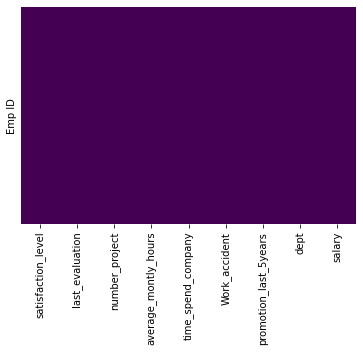

In [5]:
#FOR SHEET 2, EXISTING EMPLOYEES

sns.heatmap(employee_data2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

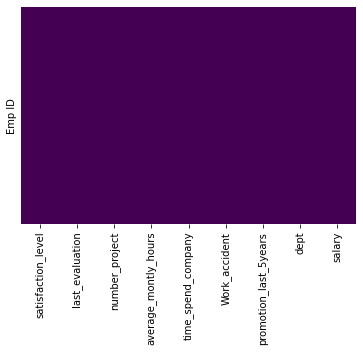

In [6]:
#FOR SHEET 3, EMPLOYEES WHO HAVE LEFT

sns.heatmap(employee_data3.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The two sheets are clean. No missing data.

CHECK THE DATA INFO

FOR EXISTING EMPLOYEES

In [7]:
employee_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11428 entries, 2001 to 14211
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11428 non-null  float64
 1   last_evaluation        11428 non-null  float64
 2   number_project         11428 non-null  int64  
 3   average_montly_hours   11428 non-null  int64  
 4   time_spend_company     11428 non-null  int64  
 5   Work_accident          11428 non-null  int64  
 6   promotion_last_5years  11428 non-null  int64  
 7   dept                   11428 non-null  object 
 8   salary                 11428 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 892.8+ KB


In [8]:
employee_data2.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


FOR EMPLOYEE WHO HAVE LEFT

In [9]:
employee_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3571 entries, 1 to 14999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3571 non-null   float64
 1   last_evaluation        3571 non-null   float64
 2   number_project         3571 non-null   int64  
 3   average_montly_hours   3571 non-null   int64  
 4   time_spend_company     3571 non-null   int64  
 5   Work_accident          3571 non-null   int64  
 6   promotion_last_5years  3571 non-null   int64  
 7   dept                   3571 non-null   object 
 8   salary                 3571 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 279.0+ KB


In [10]:
employee_data3.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


From the tables and informations above on describe and info methods, we get to know that:

1)There are 11428 entries for existing employee with mean satisfaction level of 67%, which is above average.

2)There are 3571 entries for employee who have left with mean satsifaction level of 44%, which is below average.
    

ANALYSING THE DATA

1) SALARY COUNT

In [11]:
#FOR EMPLOYEE THAT HAVE LEFT

employee_data3.salary.value_counts()

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [12]:
#FOR EXISTING EMPLOYEE

employee_data2.salary.value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

2) WORK ACCIDENT COUNT

In [13]:
#FOR EMPLOYEE THAT HAVE LEFT

employee_data3['Work_accident'] = employee_data3.Work_accident.replace(to_replace =1, value ='Yes')
employee_data3['Work_accident'] = employee_data3.Work_accident.replace(to_replace =0, value ='No')

employee_data3.Work_accident.value_counts()

No     3402
Yes     169
Name: Work_accident, dtype: int64

In [14]:
#FOR EXISTING EMPLOYEE

employee_data2['Work_accident'] = employee_data2.Work_accident.replace(to_replace =1, value ='Yes')
employee_data2['Work_accident'] = employee_data2.Work_accident.replace(to_replace =0, value ='No')

employee_data2.Work_accident.value_counts()

No     9428
Yes    2000
Name: Work_accident, dtype: int64

3) PROMOTION COUNTS FOR THE LAST 5 YEARS

In [15]:
#FOR EMPLOYEE THAT HAVE LEFT

employee_data3['promotion_last_5years'] = employee_data3.promotion_last_5years.replace(to_replace =1, value ='Yes')
employee_data3['promotion_last_5years'] = employee_data3.promotion_last_5years.replace(to_replace =0, value ='No')

employee_data3.promotion_last_5years.value_counts()

No     3552
Yes      19
Name: promotion_last_5years, dtype: int64

In [16]:
#FOR EXISTING EMPLOYEE

employee_data2['promotion_last_5years'] = employee_data2.promotion_last_5years.replace(to_replace =1, value ='Yes')
employee_data2['promotion_last_5years'] = employee_data2.promotion_last_5years.replace(to_replace =0, value ='No')

employee_data2.promotion_last_5years.value_counts()

No     11128
Yes      300
Name: promotion_last_5years, dtype: int64

SALARY BAR PLOT

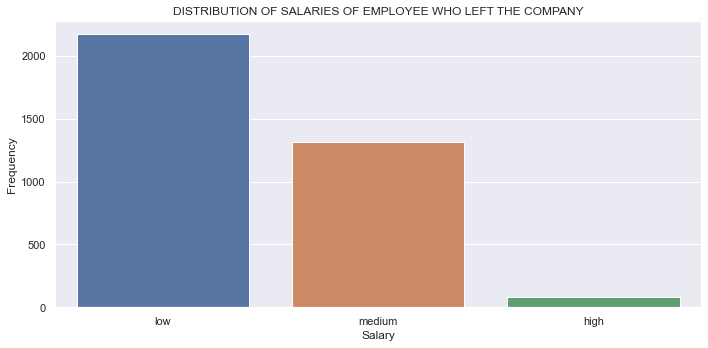

In [17]:
#FOR EMPLOYEE WHO LEFT

plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(employee_data3['salary'])
plt.title('DISTRIBUTION OF SALARIES OF EMPLOYEE WHO LEFT THE COMPANY')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()

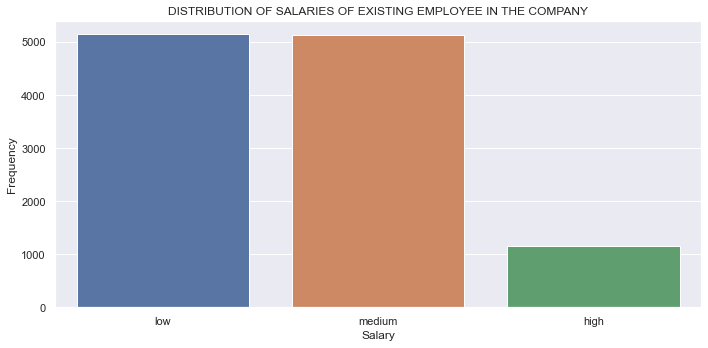

In [18]:
#FOR EXISTING EMPLOYEE

plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(employee_data2['salary'])
plt.title('DISTRIBUTION OF SALARIES OF EXISTING EMPLOYEE IN THE COMPANY')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()

DEPARTMENT BAR PLOT

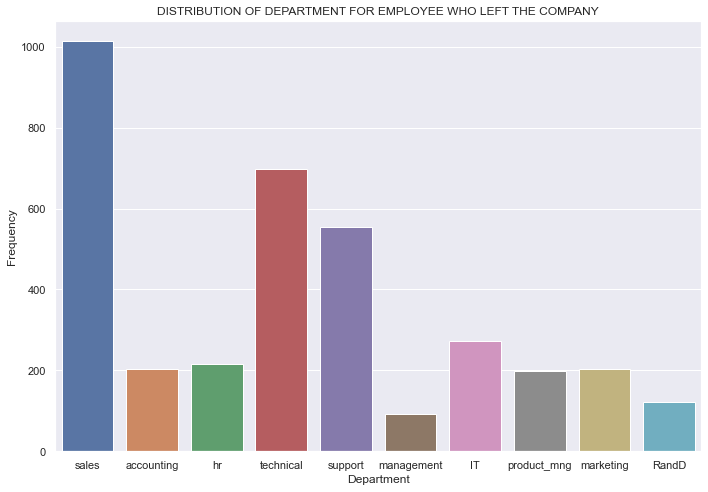

In [19]:
#FOR EMPLOYEE WHO LEFT

plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.countplot(employee_data3['dept'])
plt.title('DISTRIBUTION OF DEPARTMENT FOR EMPLOYEE WHO LEFT THE COMPANY')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.tight_layout()

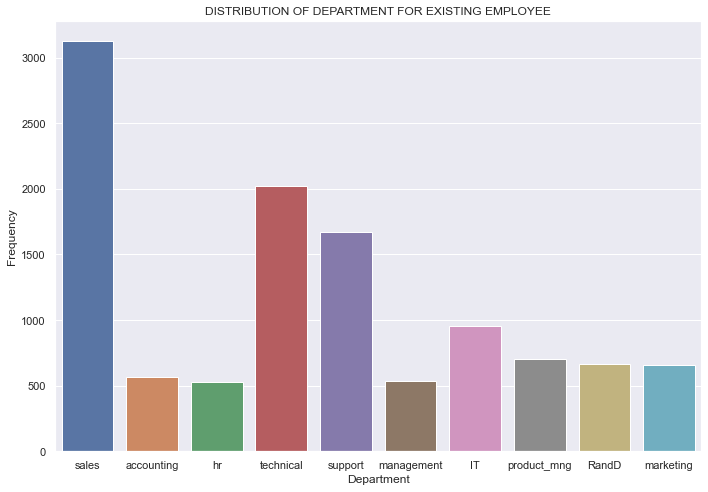

In [20]:
#FOR EXISTING EMPLOYEE

plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.countplot(employee_data2['dept'])
plt.title('DISTRIBUTION OF DEPARTMENT FOR EXISTING EMPLOYEE')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.tight_layout()

SATISFACTION LEVEL BOXPLOT

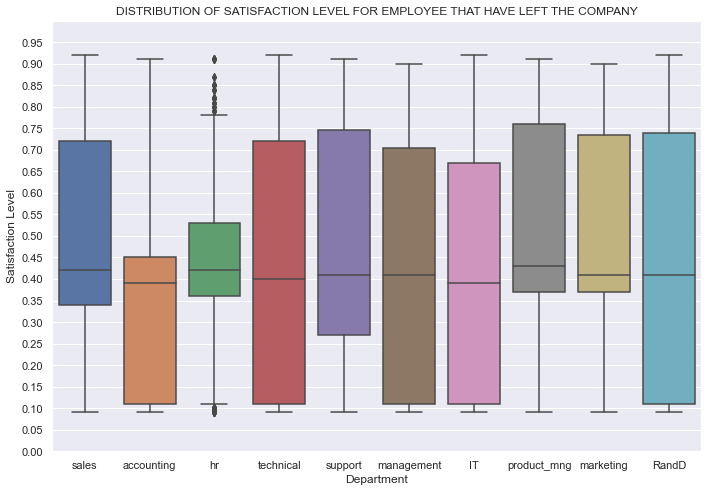

In [21]:
#FOR EXPLOYEE WHO HAVE LEFT

plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.boxplot(x='dept', y='satisfaction_level', data=employee_data3)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.title('DISTRIBUTION OF SATISFACTION LEVEL FOR EMPLOYEE THAT HAVE LEFT THE COMPANY')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.tight_layout()

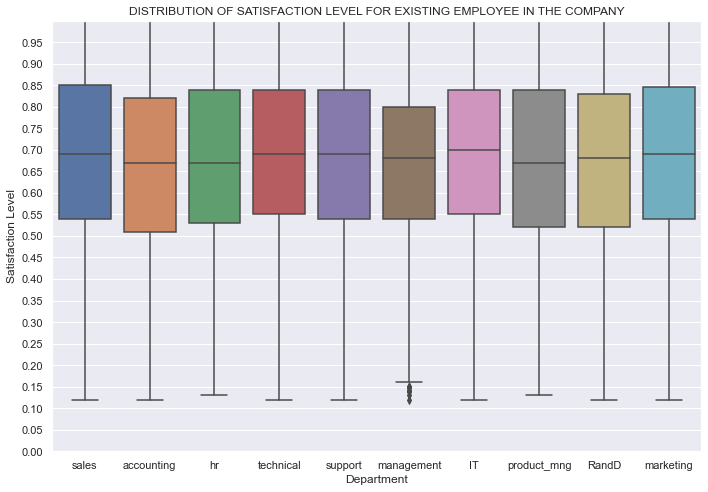

In [22]:
#FOR EXISTING EXPLOYEE

plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.boxplot(x='dept', y='satisfaction_level', data=employee_data2)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.title('DISTRIBUTION OF SATISFACTION LEVEL FOR EXISTING EMPLOYEE IN THE COMPANY')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.tight_layout()

From the boxplot, we get to know that:

1)The mean satisfaction level of the employees that left the company ranges from 33% to 44%.

2)The mean satisfaction level of the existing employees in the company ranges from 67% to 70%.

From the Satisfaction Level Chart Boxplots and from the describe method, it has been observed that the satisfaction level of employee who have left is below average which is 45%. Since we have different number counts for employees in the two categories (Employee who have left and Existing employee), we will be making comparison base on percentage.

FOR EMPLOYEES WHO HAVE LEFT THE COMPANY

In [23]:
#PERCENTAGE OF EMPLOYEE WHO HAVE LEFT THE COMPANY WITH SATISFACTION LEVEL BELOW 45%

(len(employee_data3[employee_data3['satisfaction_level']<0.45])/len(employee_data3)) * 100

64.57574908989079


From the result above an estimate of 65% of employees who left had a satisfaction level below average of 45%. This needs to be looked into as it might be a determining factor as to why employees left the company. Futher insights will be carried out as to why the satisfaction level is so low.

In [24]:
# SATISFACTION LEVEL PERCENTAGE BY SALARY

(employee_data3[employee_data3['satisfaction_level']<0.45]['salary'].value_counts(normalize=True))* 100

low       60.754553
medium    37.120555
high       2.124892
Name: salary, dtype: float64


From the result, it can be seen that, appoximately, 61% of employees who left were low income earners, 37% were medium income earners and 2% were high income earners.

Thus salary is one of the major reasons employees are disatisfied and are leaving, as 61% for low income earners is significant.

In [25]:
#SATISFACTION LEVEL PERCENTAGE BY PROMOTION  LAST 5 YEARS

(employee_data3[employee_data3['satisfaction_level']<0.45] ['promotion_last_5years'].value_counts(normalize=True))*100

No     99.566349
Yes     0.433651
Name: promotion_last_5years, dtype: float64

From the result, it is seen that approximately 99.6% of employees who left had satisfaction level below 45% as they were not  promoted in the last 5 years.

Thus promotion is a key contributing factor to why employees leave.

With the vital information gathered on the employees who have left, we can compare with the existing employees to gather insight on them.

In [26]:
##############

FOR EXISTING EMPLOYEES IN THE COMPANY

The mean satisfaction level for existing employee is 0.666810 as seen in the decribe method above, meaning the satisfaction level of the existing employees is greater than those of the employee who have left (which is 0.440098).



So, we have to determine the percentage of existing employees with satisfaction level below 45%, since huge percentage (~61%) of those who have left have satisfaction level below 45% and it could be attributed as a factor for leaving.

In [27]:
#PERCENTAGE OF EXISTING EMPLOYEE IN THE COMPANY WITH SATISFACTION LEVEL BELOW 45%

(len(employee_data2[employee_data2['satisfaction_level']<0.45])/len(employee_data2)) * 100

13.816940847042353

Approximately 14% of the existing employees have satisfaction level below 45% and are likely to leave the company base on this fact.

In [28]:
# SATISFACTION LEVEL PERCENTAGE BY SALARY

(employee_data2[employee_data2['satisfaction_level']<0.45]['salary'].value_counts(normalize=True))* 100

low       45.408486
medium    43.318556
high      11.272958
Name: salary, dtype: float64

45% of low incomer earners, 43% of medium incomer earners and 11% of high income earners are disatisfied below 45% base on their salary and are likeely to leave the company.

In [29]:
#SATISFACTION LEVEL PERCENTAGE BY PROMOTION  LAST 5 YEARS

(employee_data2[employee_data2['satisfaction_level']<0.45] ['promotion_last_5years'].value_counts(normalize=True))*100

No     97.720076
Yes     2.279924
Name: promotion_last_5years, dtype: float64

Of the existing employees with satisfaction level below 45%, 98% are disatisfied base on the fact that they have not been promoted in the last 5 years and are likely to leave the company as promotion is one of the major reasons why employees leave.

FURTHER ANALYSIS USING PIVOT TABLE

Text(0, 0.5, 'Satisfaction Level')

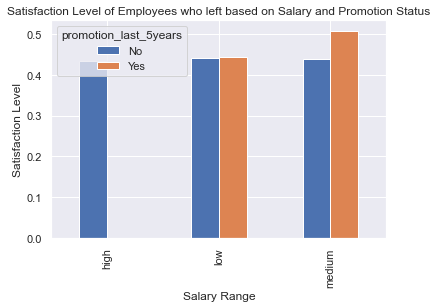

In [30]:
#FOR EMPLOYEE WHO LEFT THE COMPANY

employee_left =employee_data3.pivot_table(index='salary',columns='promotion_last_5years',values='satisfaction_level')
employee_left.plot.bar()
plt.title("Satisfaction Level of Employees who left based on Salary and Promotion Status")
plt.xlabel("Salary Range")
plt.ylabel("Satisfaction Level")

Most employees with high income who left the company were not promoted and their satisfaction level is below average of 45%. Those with Salary range from low to medium also left despite being promoted or not as their satifaction level is also below average of 45%.

Thus, satisfaction level and promotion are key factors to why people are leaving. It has been proven above that salary is also a factor determining the satisfaction level of employees as 61% of those who left base on satisfaction level below average of 45% are low income earners.

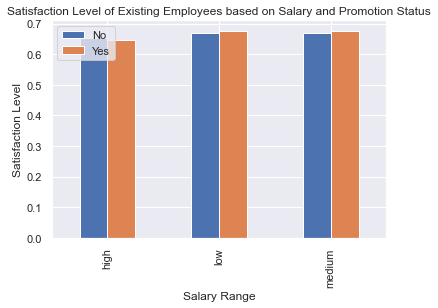

In [31]:
#FOR EXISTING EMPLOYEE

employee_exist =employee_data2.pivot_table(index='salary',columns='promotion_last_5years',values='satisfaction_level')
employee_exist.plot.bar()
plt.title("Satisfaction Level of Existing Employees based on Salary and Promotion Status")
plt.xlabel("Salary Range")
plt.ylabel("Satisfaction Level")
plt.legend(loc=2)

For the existing employees, the satisfaction level for all salary range is high, above 50% average, and promotions is evenly distributed, i.e 50% chances of been promoted, thus satisfaction level or promotion cannot be the reason why any of the employees will leave.

However, salary might be, as the number of low income and medium income earners who are satisfied below 45%, and their percentage are significant as calculated previously:

low       45.408486

medium    43.318556



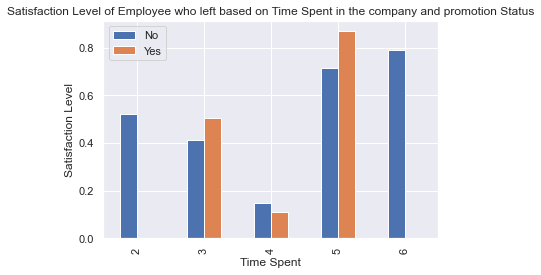

In [32]:
#FOR EMPLOYEES WHO LEFT

employee_left =employee_data3.pivot_table(index='time_spend_company',columns='promotion_last_5years',values='satisfaction_level')
employee_left.plot.bar()
plt.title("Satisfaction Level of Employee who left based on Time Spent in the company and promotion Status")
plt.xlabel("Time Spent")
plt.ylabel("Satisfaction Level")
plt.legend(loc=2)

Time Spent and promotion status are great factors that determine if an employee would leave or not. Some employees who left that spent 6 years in the company weren't promoted, even though their satisfaction level was high. Also some employees who left after 2years was not prompted and their satisfaction level was below avaerage of 0.45. It can also be seen that an avaerge employee who left spent about 4 years with poor satisfaction level less than average and mostly were not promoted.



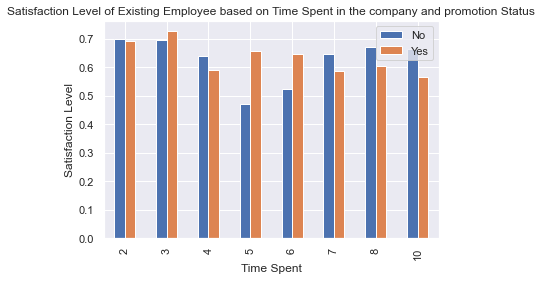

In [33]:
#FOR EXISTING EMPLOYEES

employee_exist =employee_data2.pivot_table(index='time_spend_company',columns='promotion_last_5years',values='satisfaction_level')
employee_exist.plot.bar()
plt.title("Satisfaction Level of Existing Employee based on Time Spent in the company and promotion Status")
plt.xlabel("Time Spent")
plt.ylabel("Satisfaction Level")
plt.legend(loc=1)

From the table, it is obvious that the existing employees in the company irrespective of their time spent have a good/moderate satisfaction level and their promotion was even and above average (except for those that spent 5years to 6years in the company whose satisfaction level are a bit below average).Their satisfaction level should be boosted, either by promotion or by salary increment, as they are prone to leave.

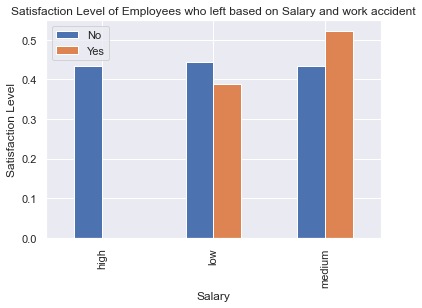

In [34]:
#FOR EMPLOYEES WHO HAVE LEFT

employee_left =employee_data3.pivot_table(index='salary',columns='Work_accident',values='satisfaction_level')
employee_left.plot.bar()
plt.title("Satisfaction Level of Employees who left based on Salary and work accident")
plt.xlabel("Salary")
plt.ylabel("Satisfaction Level")
plt.legend(loc=2)

From the table, the employees who left that earn between low and medium salaries were affected by work accidents and their satisfaction level was below average of 0.45 as compared to those with a high salary with no accident but low satisfaction level. Hence work accident and satisfaction level are reasons as to why employees are leaving the company.

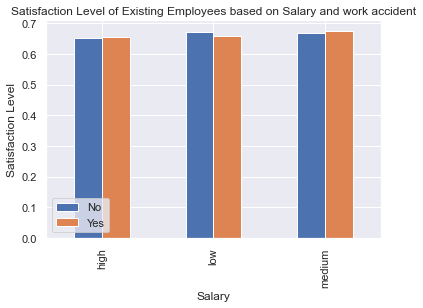

In [35]:
#FOR EXISTING EMPLOYEES

employee_exist =employee_data2.pivot_table(index='salary',columns='Work_accident',values='satisfaction_level')
employee_exist.plot.bar()
plt.title("Satisfaction Level of Existing Employees based on Salary and work accident")
plt.xlabel("Salary")
plt.ylabel("Satisfaction Level")
plt.legend(loc=3)

From the table above, although the satisfaction level of the existing employees is moderate or above average, they all tend to experience work accident irrespective of their salary range. Work accident is one of the factors why employees might leave. The company should improve on their work safety culture. 

Text(0, 0.5, 'Satisfaction Level')

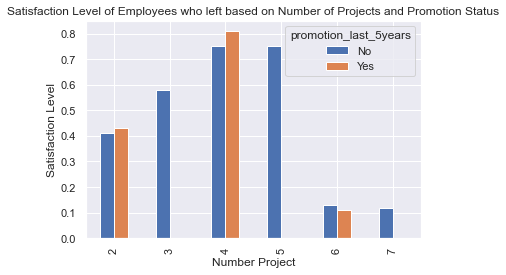

In [36]:
#FOR EMPLOYEES WHO HAVE LEFT

employee_left =employee_data3.pivot_table(index='number_project',columns='promotion_last_5years',values='satisfaction_level')
employee_left.plot.bar()
plt.title("Satisfaction Level of Employees who left based on Number of Projects and Promotion Status")
plt.xlabel("Number Project")
plt.ylabel("Satisfaction Level")

From the graph above, as the number of projects handle by the employees increase, their satisfaction level increases upto 4 number of projects, after which their satisfaction level begin to drop. As the number of projects hit 6 and above their satisfaction level drop drastically despite being promoted or not.

The moderate amount of promotion seen in employees handling 0 to 4 numbers of projects also contribute to their increase in satisfaction level as compare to very little promotion seen as the number of projects handled exceed 4 projects and hence one of the reasons their satisfaction level was so poor.

Increase in number of projects above 4 projects is a factors contributing to low level of satisfaction among the employees. And it can be worsen when there is no promotion attach.


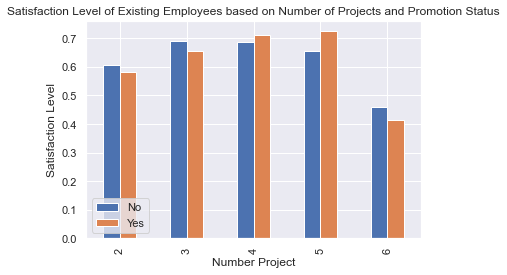

In [37]:
#FOR EXISTING EMPLOYEES

employee_exist =employee_data2.pivot_table(index='number_project',columns='promotion_last_5years',values='satisfaction_level')
employee_exist.plot.bar()
plt.title("Satisfaction Level of Existing Employees based on Number of Projects and Promotion Status")
plt.xlabel("Number Project")
plt.ylabel("Satisfaction Level")
plt.legend(loc=3)

From the ouput, it is seen that initially as the number of projects increases, satisfaction level increases until the projects number crosses 4 projects where the satisfaction level of those who are not promoted starts to drop, and a sharp drop is seen as the projects number hit 6 despite employees being promoted. This looks like the trend seen in the employees who left. 

The maximum number of projects handle by any employee should not exceed 4 projects as the employees satisfaction level is highest at this point. Also, their promotion should not stall.